In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 1. Khai phá dữ liệu

In [14]:
df = pd.read_csv("data/Student_performance_data _.csv")
df.shape

(2392, 16)

In [15]:
# Chuyển về int
df['GradeClass'] = df['GradeClass'].astype('int64')
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
GradeClassGroup        int64
dtype: object

In [16]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
GradeClassGroup      0
dtype: int64

In [17]:
df = df.drop(columns=["StudentID", "GPA", "GradeClass"])
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClassGroup
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,0.506271
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.500065
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 2. Phân tích

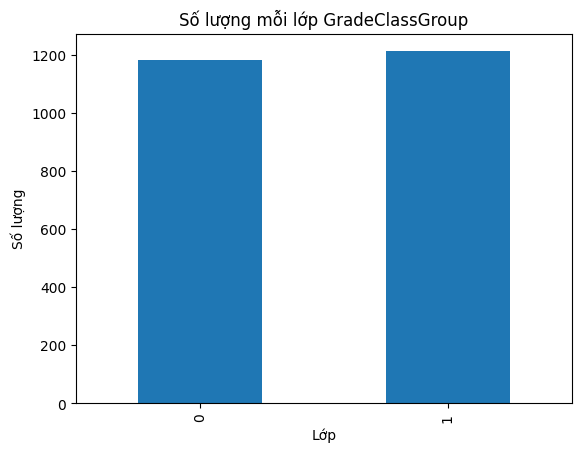

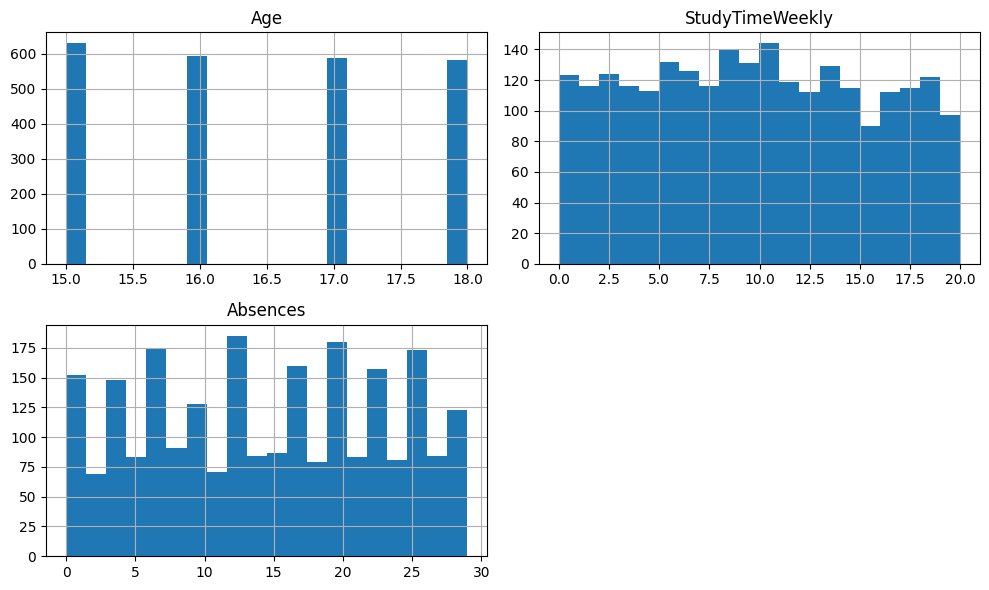

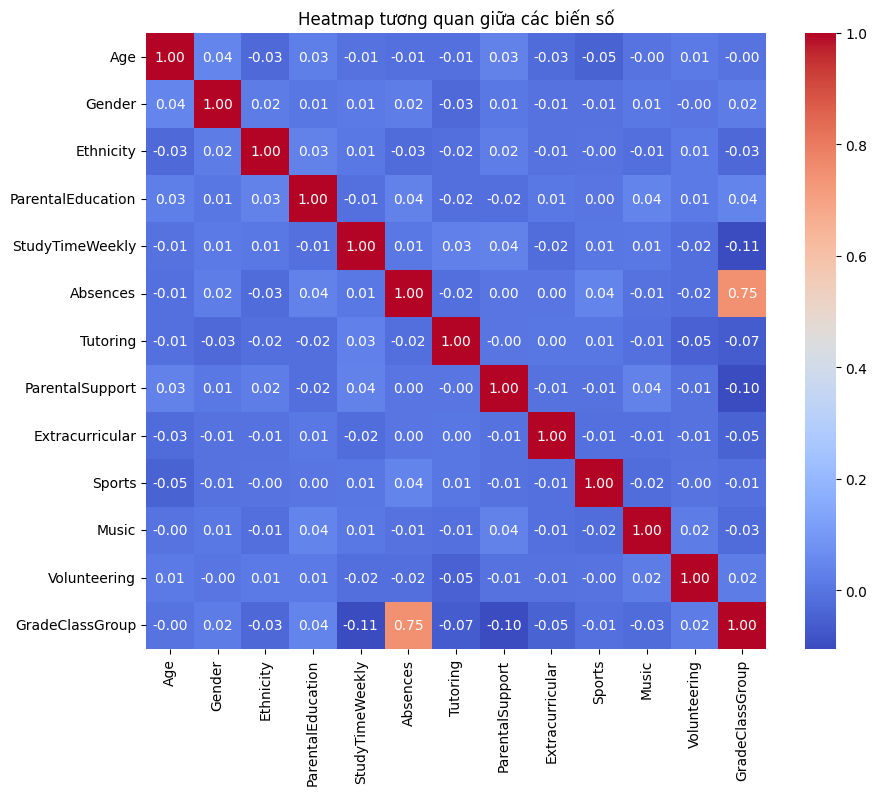

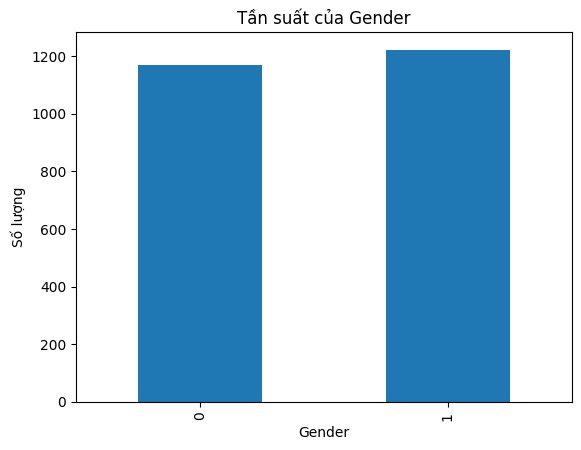

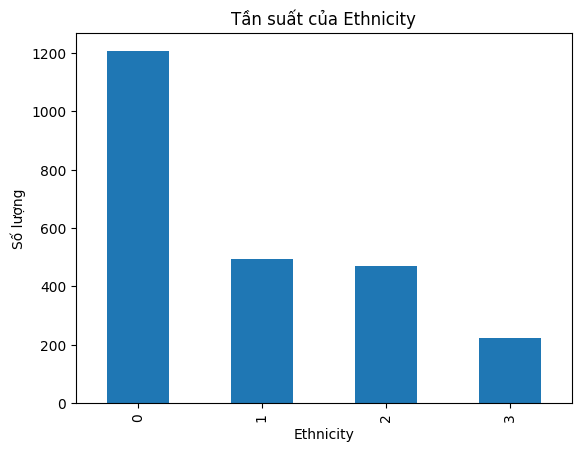

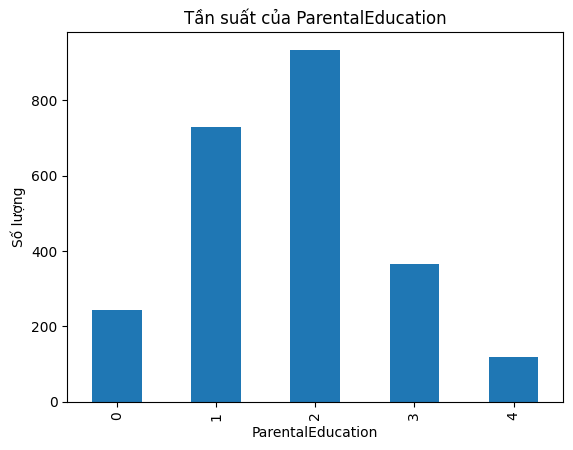

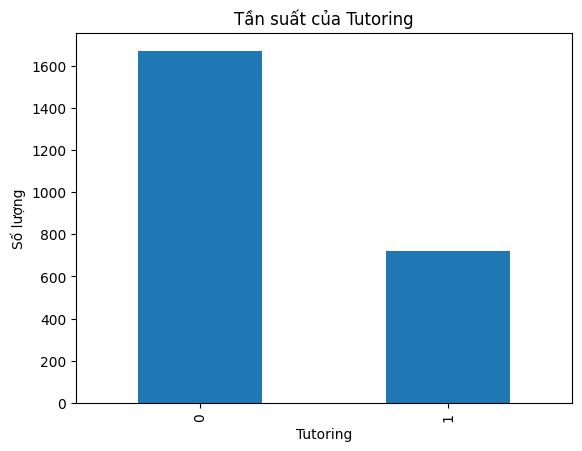

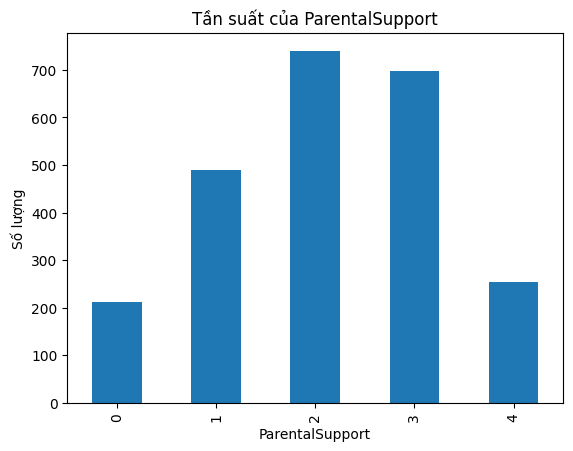

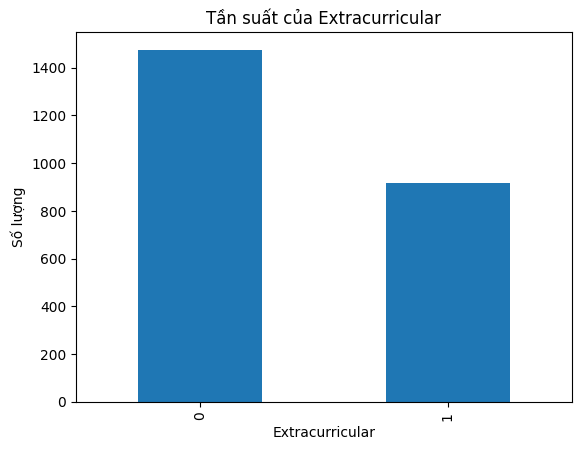

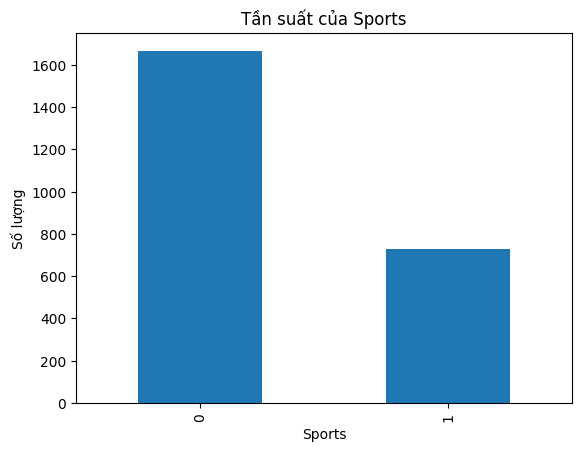

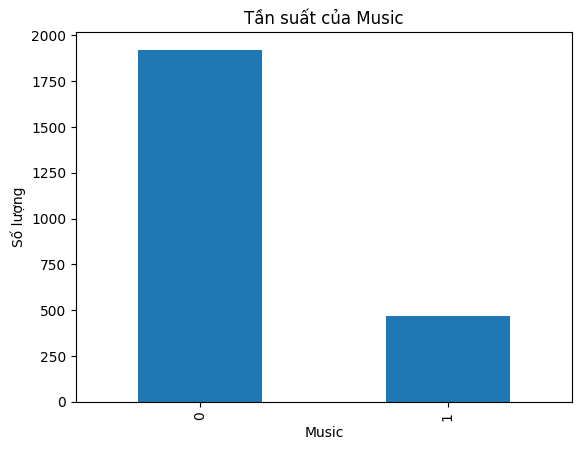

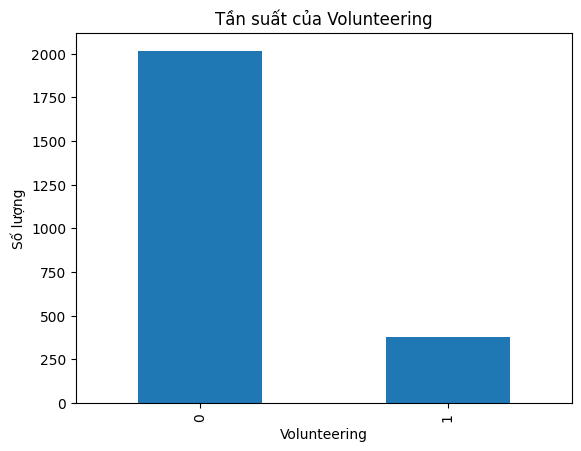

In [18]:
# 1. Phân phối của nhãn (GradeClassGroup)
df['GradeClassGroup'].value_counts().sort_index().plot(kind='bar')
plt.title("Số lượng mỗi lớp GradeClassGroup")
plt.xlabel("Lớp")
plt.ylabel("Số lượng")
plt.show()

# 2. Biểu đồ histogram cho các biến số liên tục
num_cols = ['Age', 'StudyTimeWeekly', 'Absences']
df[num_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


# Tính ma trận tương quan cho toàn bộ biến số
corr_matrix = df.corr(numeric_only=True)

# Vẽ heatmap
plt.figure(figsize=(10,8))  # điều chỉnh size cho dễ nhìn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap tương quan giữa các biến số")
plt.show()

# 4. Đếm tần suất các cột phân loại (Gender, Ethnicity,...)
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 
            'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in cat_cols:
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Tần suất của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.show()

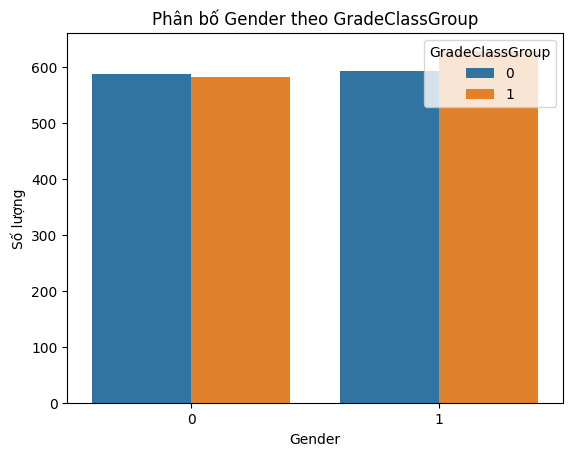

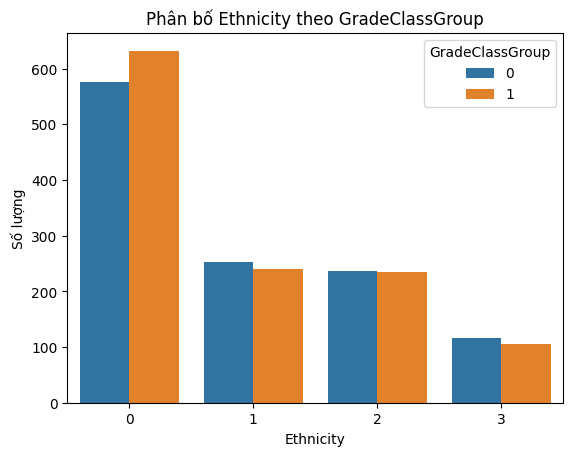

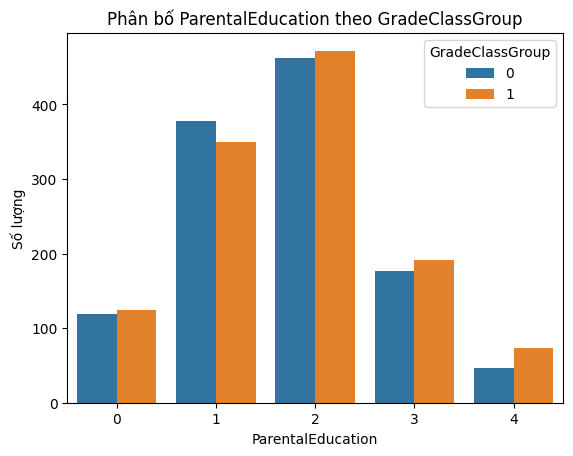

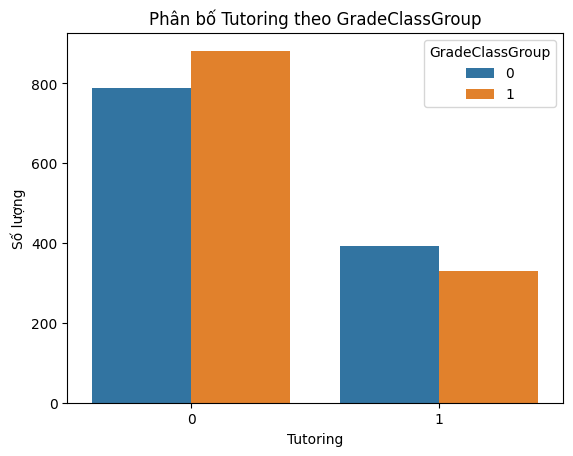

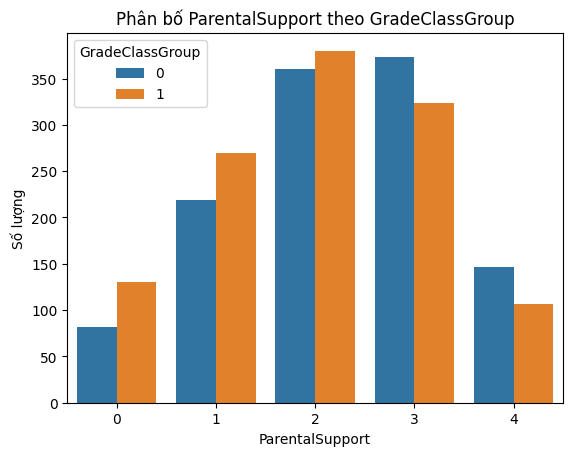

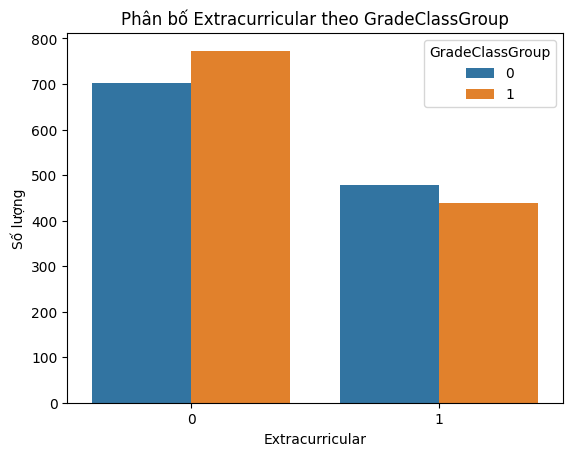

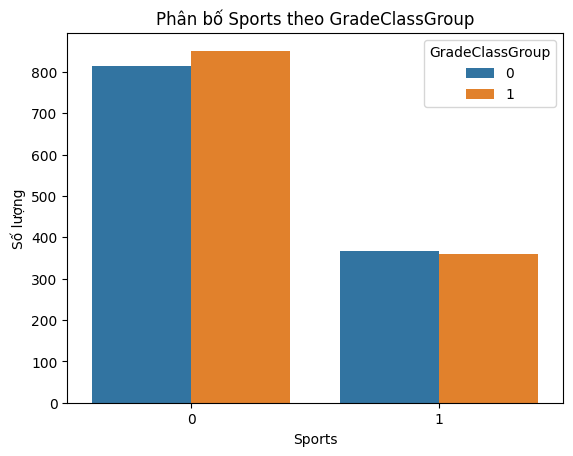

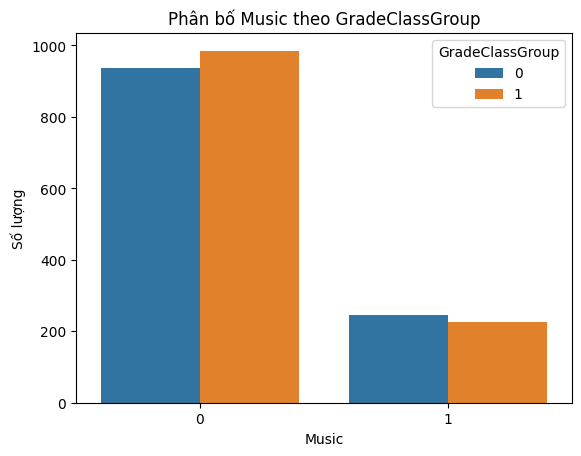

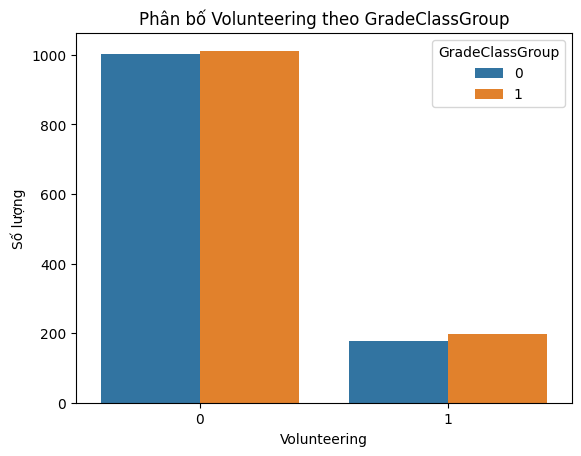

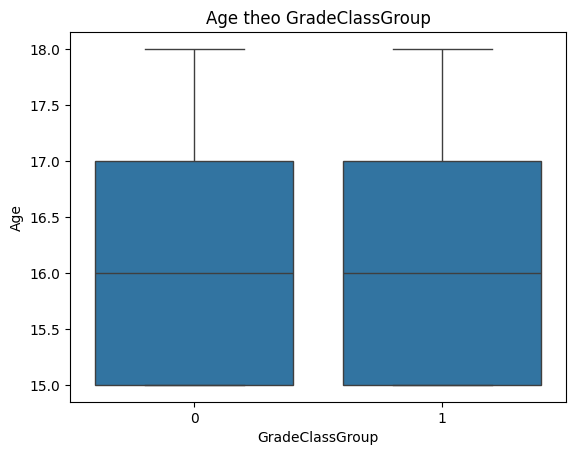

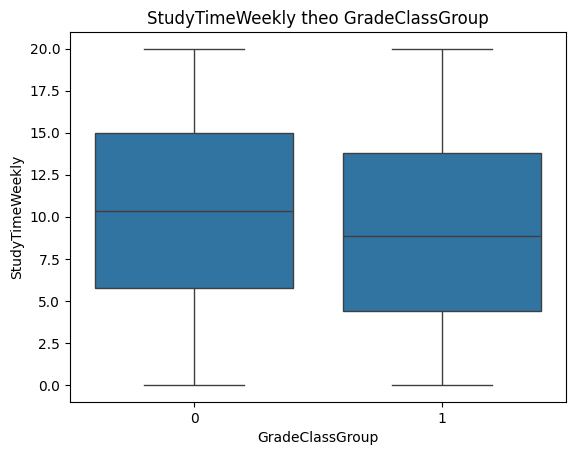

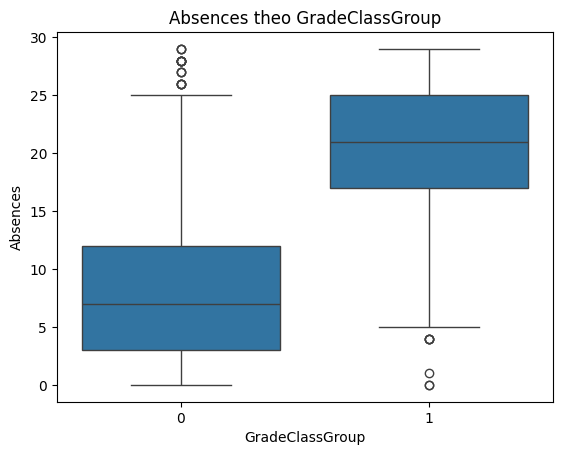

In [19]:
# 1. CÁC CỘT PHÂN LOẠI
cat_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
            'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, hue='GradeClassGroup', data=df)
    plt.title(f"Phân bố {col} theo GradeClassGroup")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.legend(title="GradeClassGroup")
    plt.show()

# 2. CÁC CỘT SỐ LIÊN TỤC
num_cols = ['Age', 'StudyTimeWeekly', 'Absences']

for col in num_cols:
    plt.figure()
    sns.boxplot(x='GradeClassGroup', y=col, data=df)
    plt.title(f"{col} theo GradeClassGroup")
    plt.xlabel("GradeClassGroup")
    plt.ylabel(col)
    plt.show()


# 3. Huấn luyện

In [20]:
X = df.drop(columns=["GradeClassGroup"])
y = df["GradeClassGroup"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=25)

# Tạo và huấn luyện mô hình Decision Tree
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
df

Accuracy: 0.8308977035490606
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       228
           1       0.86      0.81      0.83       251

    accuracy                           0.83       479
   macro avg       0.83      0.83      0.83       479
weighted avg       0.83      0.83      0.83       479



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClassGroup
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,1
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,0


In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8121085594989561
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       228
           1       0.83      0.81      0.82       251

    accuracy                           0.81       479
   macro avg       0.81      0.81      0.81       479
weighted avg       0.81      0.81      0.81       479



In [22]:
# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9164926931106472
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       228
           1       0.92      0.92      0.92       251

    accuracy                           0.92       479
   macro avg       0.92      0.92      0.92       479
weighted avg       0.92      0.92      0.92       479



In [23]:
# Naive Bayes
nvb = GaussianNB()
nvb.fit(X_train, y_train)
y_pred_nvb = nvb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nvb))
print(classification_report(y_test, y_pred_nvb))

Naive Bayes Accuracy: 0.8977035490605428
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       228
           1       0.91      0.90      0.90       251

    accuracy                           0.90       479
   macro avg       0.90      0.90      0.90       479
weighted avg       0.90      0.90      0.90       479



In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import numpy as np

# Thêm ANN vào danh sách
param_grids = {
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, 10, None],
            "criterion": ["gini", "entropy"]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"]
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "ANN": {
    "model": MLPClassifier(
        max_iter=10000,  # Số vòng tối đa
        early_stopping=True,  # Dừng sớm khi không có cải thiện
        n_iter_no_change=10,  # Số vòng không cải thiện để dừng
        validation_fraction=0.1,  # Dùng 10% dữ liệu để xác nhận sự hội tụ
        random_state=42  # Đảm bảo kết quả tái lập được
    ),
    "params": {
        "hidden_layer_sizes": [(500,), (1000,), (500, 500)],  # Các cấu hình tầng ẩn
        "activation": ["tanh", "relu"],  # Các hàm kích hoạt
        "alpha": [0.0001, 0.001, 0.01]  # Các giá trị regularization
    }
}

}

n_repeat = 1
cv = 5
results = {name: [] for name in param_grids}

for i in range(n_repeat):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=i+35)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    for name, config in param_grids.items():
        model = config["model"]
        param_grid = config["params"]

        # ANN, SVM, KNN cần scale
        if name in ["KNN", "SVM", "ANN", "Naive Bayes"]:
            X_use = X_train_scaled
        else:
            X_use = X_train

        # GridSearch nếu có tham số
        if param_grid:
            grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
            grid.fit(X_use, y_train)
            best_model = grid.best_estimator_
        else:
            best_model = model.fit(X_use, y_train)

        scores = cross_val_score(best_model, X_use, y_train, cv=cv, scoring='accuracy')
        results[name].extend(scores)

# In kết quả trung bình và độ lệch chuẩn
print(f"\n🔁 Đánh giá mô hình (ANN included) với GridSearch + Cross-Validation (Lặp {n_repeat} lần, CV={cv}):\n")
for name in results:
    acc_mean = np.mean(results[name])
    acc_std = np.std(results[name])
    print(f"🔹 {name}: Mean Accuracy = {acc_mean:.4f} | Std = {acc_std:.4f}")



🔁 Đánh giá mô hình (ANN included) với GridSearch + Cross-Validation (Lặp 1 lần, CV=5):

🔹 Decision Tree: Mean Accuracy = 0.8667 | Std = 0.0033
🔹 KNN: Mean Accuracy = 0.8285 | Std = 0.0182
🔹 SVM: Mean Accuracy = 0.9096 | Std = 0.0096
🔹 Naive Bayes: Mean Accuracy = 0.8876 | Std = 0.0183
🔹 ANN: Mean Accuracy = 0.9028 | Std = 0.0060
